# Sparse Auto-Encoder

A sparse autoencoder tries to minimize the number of activations.

Many ways to obtain sparsity, the simplest one is a regularization penalty term:
$\large E_s(\theta) = E(\theta) + \lambda |\theta|_1$

Different levels of regularization can be achieved with different $p$-norms:

<img src="images/norms.png" width="550pt"/>


In [1]:
# Loading the tools:
%run autoencoders.py

print("Creating the net...")
autoencoder, encoder, decoder = create_net(l1_regularization=True)

Creating the net...


Loading the data...


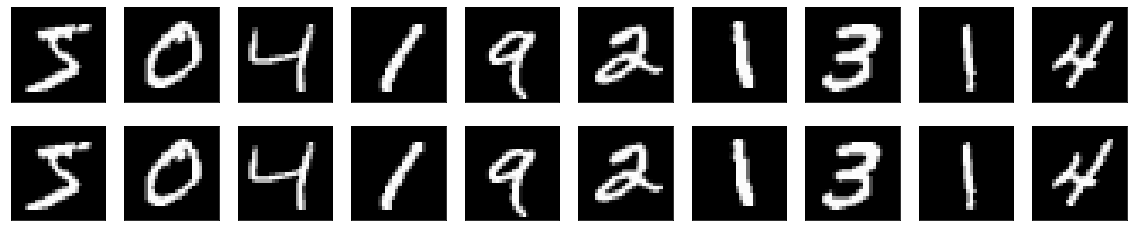

In [2]:
print("Loading the data...")

x_train, y_train, x_test, y_test = load_data()

imshowcompare(x_train, y_train)

In [3]:
from tensorflow.keras.callbacks import TensorBoard

print("Training SAE...")

train(
    net=autoencoder,
    train_data=(x_train, y_train), 
    validation_data=(x_test, y_test),
    callbacks=[TensorBoard(log_dir='generated/SAE')]
)


Training SAE...
Epoch 1/30
938/938 [==============================] - 52s 55ms/step - loss: 0.2814 - val_loss: 0.1427
Epoch 2/30
938/938 [==============================] - 49s 53ms/step - loss: 0.1364 - val_loss: 0.1237
Epoch 3/30
938/938 [==============================] - 50s 54ms/step - loss: 0.1232 - val_loss: 0.1165
Epoch 4/30
938/938 [==============================] - 50s 53ms/step - loss: 0.1168 - val_loss: 0.1126
Epoch 5/30
938/938 [==============================] - 47s 50ms/step - loss: 0.1129 - val_loss: 0.1094
Epoch 6/30
938/938 [==============================] - 48s 51ms/step - loss: 0.1105 - val_loss: 0.1069
Epoch 7/30
938/938 [==============================] - 50s 53ms/step - loss: 0.1083 - val_loss: 0.1051
Epoch 8/30
938/938 [==============================] - 48s 51ms/step - loss: 0.1064 - val_loss: 0.1044
Epoch 9/30
938/938 [==============================] - 52s 55ms/step - loss: 0.1049 - val_loss: 0.1046
Epoch 10/30
938/938 [==============================] - 48s 51ms/st

In [4]:
# Saving the models separatedly and together:
autoencoder.save('generated/sae_autoencoder')
encoder.save('generated/sae_encoder')
decoder.save('generated/sae_decoder')

INFO:tensorflow:Assets written to: generated/sae_autoencoder/assets
INFO:tensorflow:Assets written to: generated/sae_encoder/assets
INFO:tensorflow:Assets written to: generated/sae_decoder/assets


In [5]:
from tensorflow.keras.models import load_model

# Loading the models back:
autoencoder = load_model('generated/sae_autoencoder')
encoder = load_model('generated/sae_encoder')
decoder = load_model('generated/sae_decoder')

Using the encoder/decoder pair on original images...


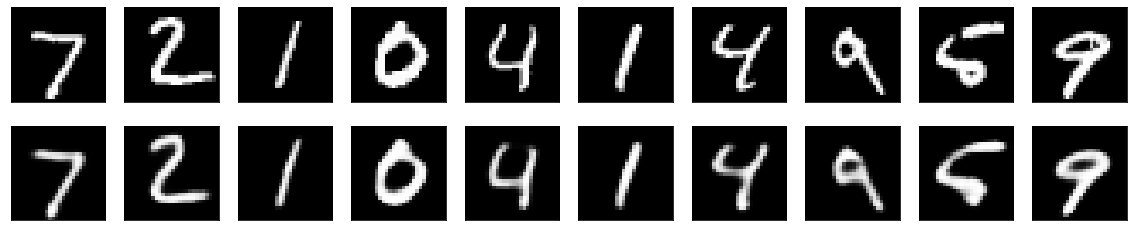

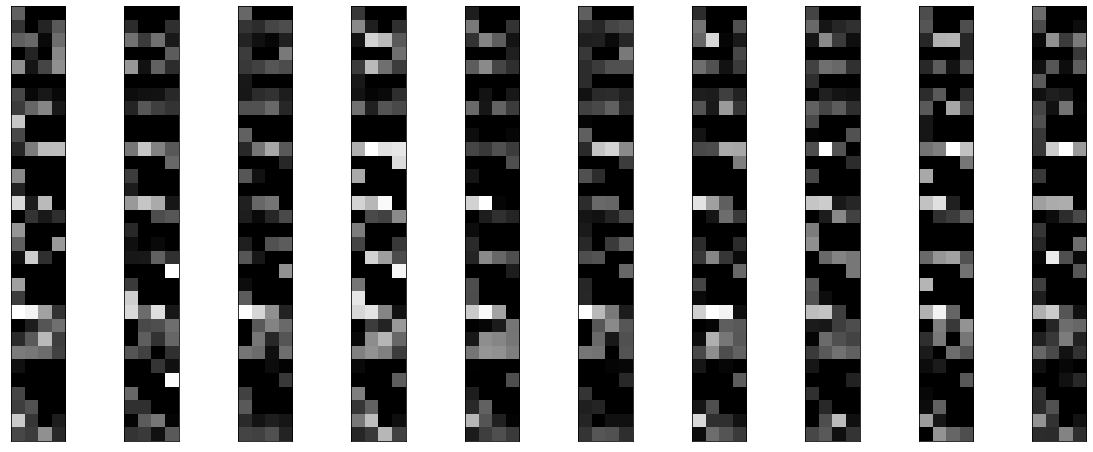

In [6]:
print("Using the encoder/decoder pair on original images...")

encoded_imgs = encoder.predict(y_test)
decoded_imgs = decoder.predict(encoded_imgs)

imshowcompare(y_test, decoded_imgs)

plotfeatures(encoded_imgs)